In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
mainpath = "C:/Users/kmurg/OneDrive/Escritorio/Kev/1-Cursos/Machine Learning/python-ml-course-master/datasets"
data_ads = pd.read_csv(mainpath+"/"+"ads/Advertising.csv")

In [44]:
data_ads.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
len(data_ads) 

200

In [46]:
data_ads["Tv_Corr"]=(data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))
#data_ads["Radio_Corr"]=(data_ads["Radio"]-np.mean(data_ads["Radio"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))
#data_ads["NewsP_Corr"]=(data_ads["Newspaper"]-np.mean(data_ads["Newspaper"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [47]:
data_ads["Corr_1"]=(data_ads["TV"]-np.mean(data_ads["TV"]))**2
data_ads["Corr_2"]=(data_ads["Sales"]-np.mean(data_ads["Sales"]))**2                    

In [48]:
data_ads.head()

,TV,Radio,Newspaper,Sales,Tv_Corr,Corr_1,Corr_2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [49]:
corr_pearson_TV = sum (data_ads["Tv_Corr"]) / np.sqrt((sum(data_ads["Corr_1"]))*(sum(data_ads["Corr_2"])))
corr_pearson_TV

0.782224424861606

Teniendo en cuenta un coeficiente de correlación de 0.78 podemos asumir que a medida que más se invierte en publicidad mayores serán las ventas.

In [50]:
def corr_coeff(df, var1, var2):
    df["CorrN"]=(df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["CorrD1"]=(df[var1]-np.mean(df[var1]))**2
    df["CorrD2"]=(df[var2] - np.mean(df[var2]))**2 
    corr_pearson = sum (df["CorrN"]) / np.sqrt(sum(df["CorrD1"])*(sum(df["CorrD2"])))
    return corr_pearson

In [51]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [52]:
corr_coeff(data_ads, "Radio", "Sales")

0.5762225745710553

In [53]:
corr_coeff(data_ads, "Newspaper", "Sales")

0.22829902637616525

In [57]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [59]:
for x in cols: 
    for y in cols:
        print (x + ", " + y + " : " + str(corr_coeff(data_ads, x, y)) )

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


In [85]:
for x in cols: 
    for y in cols:
        if(x != y):
            print (x + ", " + y + " : " + str(corr_coeff(data_ads, x, y)) )

TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525


Text(0.5, 0, 'Gasto TV')

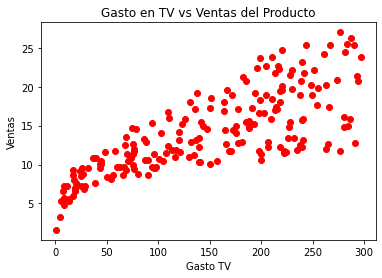

In [77]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")
plt.ylabel("Ventas")
plt.xlabel("Gasto TV")

Text(0.5, 0, 'Gasto Radio')

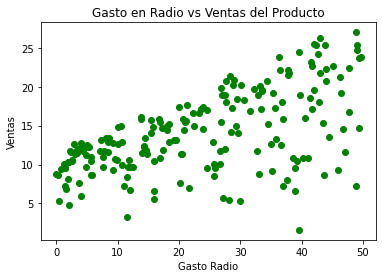

In [80]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")
plt.ylabel("Ventas")
plt.xlabel("Gasto Radio")

Text(0.5, 0, 'Gasto Newspaper')

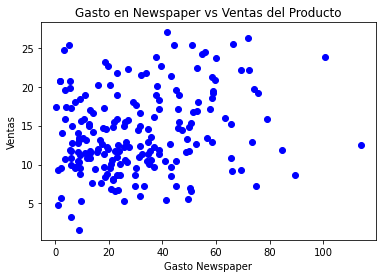

In [81]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Newspaper vs Ventas del Producto")
plt.ylabel("Ventas")
plt.xlabel("Gasto Newspaper")

In [87]:
data_ads = pd.read_csv(mainpath+"/"+"ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


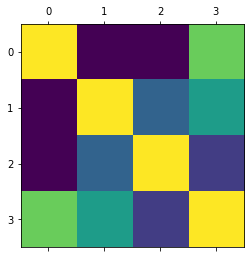

In [88]:
plt.matshow(data_ads.corr())

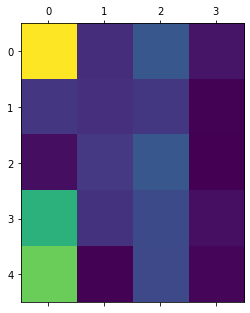

In [91]:
plt.matshow(data_ads.head(5))